# Load BSON files

In [432]:
import os
import numpy as np
import bson

def getBsonFiles(DIR):
    files = os.listdir(DIR)
    bson_files = []

    for f in files:
        if ".bson" in f:
            bson_files.append(f)

    print(bson_files)
    return bson_files

In [433]:
DATA_DIR = os.getcwd() + "/data/fddg-db7/fddg"

In [434]:
bson_files = getBsonFiles(DATA_DIR)

['users.bson', 'metas.bson', 'chunks.bson']


In [435]:
bson_data = {}

for b in bson_files:
    with open(DATA_DIR + "/" + b, "rb") as f:
        bson_data[b] = bson.decode_all(f.read())

# Load all BSON data into class objects

In [436]:
class Meta:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.subject_id = json_doc["subject_id"]
        self.phone_placement = json_doc["phone_placement"]
        self.recording_duration = json_doc["recording_duration"]
        self.chunk_ids = json_doc["chunk_ids"]
        
class Chunk:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.recording_id = json_doc["recording_id"]
        self.chunk_index = json_doc["chunk_index"]
        self.labels = json_doc["labels"]
        self.p_ecg = json_doc["p_ecg"]
        self.p_hr = json_doc["p_hr"]
        self.p_contact = json_doc["p_contact"]
        self.p_acc_x = json_doc["p_acc_x"]
        self.p_acc_y = json_doc["p_acc_y"]
        self.p_acc_z = json_doc["p_acc_z"]
        self.acc_x = json_doc["acc_x"]
        self.acc_y = json_doc["acc_y"]
        self.acc_z = json_doc["acc_z"]
        self.gyr_x = json_doc["gyr_x"]
        self.gyr_y = json_doc["gyr_y"]
        self.gyr_z = json_doc["gyr_z"]
        self.gra_x = json_doc["gra_x"]
        self.gra_y = json_doc["gra_y"]
        self.gra_z = json_doc["gra_z"]
        self.mag_x = json_doc["mag_x"]
        self.mag_y = json_doc["mag_y"]
        self.mag_z = json_doc["mag_z"]
        self.att_roll = json_doc["att_roll"]
        self.att_pitch = json_doc["att_pitch"]
        self.att_yaw = json_doc["att_yaw"]
        self.delta_heading = json_doc["delta_heading"]
        
class User:
    def __init__(self, json_doc):
        self.subject_id = json_doc["subject_id"]
        self.name = json_doc["name"]
        self.yob = json_doc["yob"]
        self.height = json_doc["height"]
        self.weight = json_doc["weight"]
        self.is_female = json_doc["is_female"]
        self.medical_conditions = json_doc["medical_conditions"]

In [437]:
metas = []
rec_chunks = {}
chunks = {}
users = {}

In [438]:
# Metas
for doc in bson_data[bson_files[1]]:
    meta = Meta(doc)
    metas.append(meta)
    
# Chunks
for doc in bson_data[bson_files[2]]:
    chunk = Chunk(doc)
    print(chunk._id)
    print(chunk.recording_id)
    print()
    
    if chunk.recording_id in rec_chunks.keys():
        rec_chunks[chunk.recording_id].append(chunk)
    else:
        rec_chunks[chunk.recording_id] = [chunk]
    
    chunks[chunk._id] = chunk

# Users
for doc in bson_data[bson_files[0]]:
    user = User(doc)
    users[user.subject_id] = user

AC5615C8-0879-440B-86A1-690D7D373079
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

F1616675-9C86-436B-B19C-59D0C7093BA7
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

0A9E22D5-5EF5-4EC1-9C1C-721F6113E3C9
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

F848FE7D-29AE-4985-9642-7212114D5D74
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

8AF7428B-BF12-4A63-879D-EA021A574C10
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

5D0393F4-42B5-43AB-B383-03A2075A2A48
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

A0FBF3E8-38DE-41AF-9747-89D162F50E97
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

51C71C08-D408-48C2-B07C-706B1AD1CE05
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

7A52F38C-F3FF-4809-93E2-AE8D842B8400
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

3F69E045-8794-4905-BEBC-1E1C3701656D
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

A3464680-5171-46F2-ACE2-642D89994291
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

0F876AB3-A355-4114-B43D-BA09162626B4
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

6AAB6595-A7DB-4907-B1E9-1355B6568904
CD3E0FD8-86EB-4A97-84CF-248B5B6EB132

94863798-09DB-48C5-9310-9

In [439]:
for c in rec_chunks["F7A36C71-FE01-42B7-980E-1112F369EC0D"]:
    print(c.chunk_index)
    print(len(c.labels))
    print(len(c.p_ecg))
    print(len(c.p_acc_x))
    print(len(c.acc_x))
    print()

0
50
657
1008
49

1
50
657
1008
50

2
50
657
1008
50

3
50
657
1044
51

4
50
657
1008
50



In [440]:
for c in rec_chunks["CD3E0FD8-86EB-4A97-84CF-248B5B6EB132"]:
    print(c.chunk_index)
    print(len(c.labels))
    print(len(c.p_ecg))
    print(len(c.p_acc_x))
    print(len(c.acc_x))
    print()

0
50
146
288
48

1
50
657
1008
50

2
50
657
1044
51

3
50
657
1008
50

4
50
657
1008
50

6
50
584
1008
50

7
50
657
1008
50

8
50
657
1008
50

9
50
657
1044
51

10
50
657
1008
50

11
50
657
1008
50

12
50
657
1008
50

13
30
365
648
31

5
50
657
1008
51



# Merge all chunks and meta data into a single object for each recording

In [441]:
class Recording:
    def __init__(self, meta):
        self._id = meta._id
        self.subject_id = meta.subject_id
        self.phone_placement = meta.phone_placement
        self.recording_duration = meta.recording_duration
        self.chunk_ids = meta.chunk_ids
        self.labels = []
        self.p_ecg = []
        self.p_hr = []
        self.p_contact = []
        self.p_acc_x = []
        self.p_acc_y = []
        self.p_acc_z = []
        self.acc_x = []
        self.acc_y = []
        self.acc_z = []
        self.gyr_x = []
        self.gyr_y = []
        self.gyr_z = []
        self.gra_x = []
        self.gra_y = []
        self.gra_z = []
        self.mag_x = []
        self.mag_y = []
        self.mag_z = []
        self.att_roll = []
        self.att_pitch = []
        self.att_yaw = []
        self.delta_heading = []
        
        print(self._id)
        r_chunks = rec_chunks[self._id]
        for c in r_chunks:
            print(c._id)
        print()
        ordered_chunk_ids = {}
        
        for chunk in r_chunks:
            ordered_chunk_ids[chunk.chunk_index] = chunk
            
        for i in range(1,len(r_chunks)-1):
            chunk = chunks[ordered_chunk_ids[i]._id]
            
            assert(i == chunk.chunk_index)
            
            self.labels += chunk.labels
            self.p_ecg += chunk.p_ecg
            self.p_hr += chunk.p_hr
            self.p_contact += chunk.p_contact
            self.p_acc_x += chunk.p_acc_x
            self.p_acc_y += chunk.p_acc_y
            self.p_acc_z += chunk.p_acc_z
            self.acc_x += chunk.acc_x
            self.acc_y += chunk.acc_y
            self.acc_z += chunk.acc_z
            self.gyr_x += chunk.gyr_x
            self.gyr_y += chunk.gyr_y
            self.gyr_z += chunk.gyr_z
            self.gra_x += chunk.gra_x
            self.gra_y += chunk.gra_y
            self.gra_z += chunk.gra_z
            self.mag_x += chunk.mag_x
            self.mag_y += chunk.mag_y
            self.mag_z += chunk.mag_z
            self.att_roll += chunk.att_roll
            self.att_pitch += chunk.att_pitch
            self.att_yaw += chunk.att_yaw
            self.delta_heading += chunk.delta_heading

            print(len(chunk.labels))
            print(len(chunk.p_ecg))
            print(len(chunk.p_hr))
            print(len(chunk.p_acc_x))
            print(len(chunk.p_contact))
            print(len(chunk.acc_x))
            print()
            
        print(len(self.labels))
        print(len(self.p_ecg))
        print(len(self.p_hr))
        print(len(self.p_acc_x))
        print(len(self.p_contact))
        print(len(self.acc_x))
        print()
            

In [442]:
recordings = []

In [443]:
for meta in metas:
    recordings.append(Recording(meta))

CD3E0FD8-86EB-4A97-84CF-248B5B6EB132
AC5615C8-0879-440B-86A1-690D7D373079
F1616675-9C86-436B-B19C-59D0C7093BA7
0A9E22D5-5EF5-4EC1-9C1C-721F6113E3C9
F848FE7D-29AE-4985-9642-7212114D5D74
8AF7428B-BF12-4A63-879D-EA021A574C10
5D0393F4-42B5-43AB-B383-03A2075A2A48
A0FBF3E8-38DE-41AF-9747-89D162F50E97
51C71C08-D408-48C2-B07C-706B1AD1CE05
7A52F38C-F3FF-4809-93E2-AE8D842B8400
3F69E045-8794-4905-BEBC-1E1C3701656D
A3464680-5171-46F2-ACE2-642D89994291
0F876AB3-A355-4114-B43D-BA09162626B4
6AAB6595-A7DB-4907-B1E9-1355B6568904
94863798-09DB-48C5-9310-98610F999649

50
657
389
1008
5
50

50
657
651
1044
5
51

50
657
890
1008
5
50

50
657
1140
1008
5
50

50
657
1417
1008
5
51

50
584
1640
1008
5
50

50
657
1890
1008
5
50

50
657
2140
1008
5
50

50
657
2436
1044
5
51

50
657
2640
1008
5
50

50
657
2889
1008
5
50

50
657
3138
1008
5
50

600
7811
21260
12168
60
603

F7A36C71-FE01-42B7-980E-1112F369EC0D
C318BE85-D68D-4CD1-842A-843FA163BC3E
A5F93491-5DA7-4EAC-9C2A-C488CE89F3E3
B20F88E4-9112-4FFE-9FCD-85199A4

In [444]:
for r in recordings:
    print(r.recording_duration)

68.00000000000041
25.000000000000085


# Visualize fall

In [445]:
import matplotlib.pyplot as plt

In [465]:
def getFallIndexes(labels):
    val = True
    sublist = labels
    idxs = []
    lastIdx = 0

    while len(sublist) > 0:
        if val in sublist:
            idx = sublist.index(val)
            idxs.append(lastIdx + idx)
            sublist = labels[lastIdx + idx:]
            val = not val
            lastIdx += idx
        else:
            sublist = []
            
    return idxs

In [476]:
def plot_time(data, labels):
    print(len(data))
    print(len(data)/len(labels))
    print()
    
    mu = sum(data)/len(data)
    data = [el-mu for el in data]
    
    if abs(min(data)) > max(data):
        data = [el/abs(min(data)) for el in data]
    else:
        data = [el/max(data) for el in data]
        
    idxs = getFallIndexes(labels)
    
    for idx in idxs:
        plt.plot([idx]*2, np.linspace(-2,2,2),color="red")
    
    plt.plot(np.arange(0, len(data))*len(labels)/len(data), data)
    plt.xticks(np.linspace(0, len(labels), len(labels)), labels, rotation=90, fontsize=4)
    plt.ylim(-1.1,1.1)
    
def plot_recording(rec):
    plt.clf()
    plot_time(rec.p_ecg, rec.labels)
    plot_time(rec.p_acc_x, rec.labels)
    plot_time(rec.p_acc_y, rec.labels)
    plot_time(rec.p_acc_z, rec.labels)
    plot_time(rec.acc_x, rec.labels)
    plot_time(rec.acc_y, rec.labels)
    plot_time(rec.acc_z, rec.labels)
    plot_time(rec.gra_x, rec.labels)
    plot_time(rec.gra_y, rec.labels)
    plot_time(rec.gra_z, rec.labels)
    plot_time(rec.gyr_x, rec.labels)
    plot_time(rec.gyr_y, rec.labels)
    plot_time(rec.gyr_z, rec.labels)
    plot_time(rec.mag_x, rec.labels)
    plot_time(rec.mag_y, rec.labels)
    plot_time(rec.mag_z, rec.labels)
    plot_time(rec.delta_heading, rec.labels)
    plot_time(rec.att_pitch, rec.labels)
    plot_time(rec.att_roll, rec.labels)
    plot_time(rec.att_yaw, rec.labels)
    plt.show()

In [447]:
for r in recordings:
    print(r._id)

CD3E0FD8-86EB-4A97-84CF-248B5B6EB132
F7A36C71-FE01-42B7-980E-1112F369EC0D


7811
13.018333333333333

12168
20.28

12168
20.28

12168
20.28

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005

603
1.005



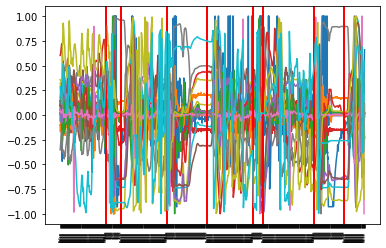

In [480]:
plt.clf()
plot_recording(recordings[0])

1971
13.14

3060
20.4

3060
20.4

3060
20.4

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666



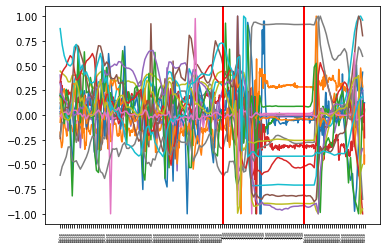

In [479]:
plt.clf()
plot_recording(recordings[1])

1971
13.14



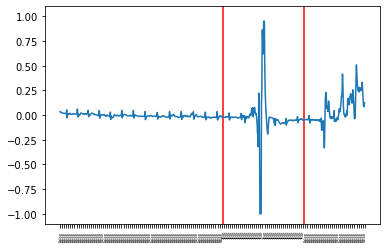

In [477]:
plot_time(recordings[1].p_ecg, recordings[1].labels)

7811
13.018333333333333



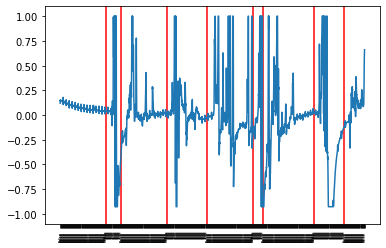

In [478]:
plot_time(recordings[0].p_ecg, recordings[0].labels)